# **HOUSE PRICE PRIDICTION**

---



### **IMPORTING LIBRARY & CSV FILE**

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! ls '/content/drive/MyDrive/Machine_learning'

Attrition.csv  Churn_UCI_dataset.xlsx  df_test.csv   energydata_complete.csv
auto-mpg.txt   ClassifyRisk.txt        df_train.csv  UniversalBank.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import xlrd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
db = pd.read_csv('/content/drive/MyDrive/Machine_learning/df_train.csv')
db_1 = pd.read_csv('/content/drive/MyDrive/Machine_learning/df_test.csv')

### **DATA PREPRATION**

In [ ]:
db.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13603 entries, 0 to 13602
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               13603 non-null  object 
 1   price              13603 non-null  float64
 2   bedrooms           13603 non-null  int64  
 3   grade              13603 non-null  int64  
 4   has_basement       13603 non-null  bool   
 5   living_in_m2       13603 non-null  float64
 6   renovated          13603 non-null  bool   
 7   nice_view          13603 non-null  bool   
 8   perfect_condition  13603 non-null  bool   
 9   real_bathrooms     13603 non-null  int64  
 10  has_lavatory       13603 non-null  bool   
 11  single_floor       13603 non-null  bool   
 12  month              13603 non-null  int64  
 13  quartile_zone      13603 non-null  int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 930.0+ KB


In [ ]:
db.describe()

,price,bedrooms,grade,living_in_m2,real_bathrooms,month,quartile_zone
count,1.360300e+04,13603.000000,13603.000000,13603.000000,13603.000000,13603.000000,13603.000000
mean,4.752861e+05,2.238624,2.530177,181.746181,1.678968,6.579872,2.425568
std,2.073232e+05,0.682151,0.969782,67.917214,0.627218,3.126552,1.071046
min,8.100000e+04,1.000000,1.000000,49.238590,1.000000,1.000000,1.000000
25%,3.150000e+05,2.000000,2.000000,130.064200,1.000000,4.000000,2.000000
50%,4.350000e+05,2.000000,2.000000,171.870550,2.000000,6.000000,2.000000
75%,5.999500e+05,3.000000,3.000000,224.825260,2.000000,9.000000,3.000000
max,1.155000e+06,3.000000,5.000000,391.121630,3.000000,12.000000,4.000000


In [ ]:
db.isnull().sum()

,0
date,0
price,0
bedrooms,0
grade,0
has_basement,0
living_in_m2,0
renovated,0
nice_view,0
perfect_condition,0
real_bathrooms,0


In [ ]:
db.duplicated().sum()

2

In [ ]:
db.drop_duplicates(inplace=True)

In [ ]:
db.duplicated().sum()

0

In [ ]:
num_cols = db.select_dtypes(include = ['int64','float64']).columns
cat_cols = db.select_dtypes(exclude = ['int64','float64']).columns

In [ ]:
num_cols_1 = db.select_dtypes(include = ['int64','float64']).columns
cat_cols_1 = db.select_dtypes(exclude = ['int64','float64']).columns

In [ ]:
for col in db.columns:
  if 'date' in col.lower():
    try:
      db[col] = pd.to_datetime(db[col])
    except:
      pass

for col in db.columns:
  if 'date' in col.lower():
    db[col + '_year'] = db[col].dt.year
    db[col + '_month'] = db[col].dt.month
    db[col + '_day'] = db[col].dt.day

for col in db.columns:
  if 'date' in col.lower() and '_year' not in col and '_month' not in col and '_day' not in col:
    db = db.drop(col, axis=1)


## **EDA**

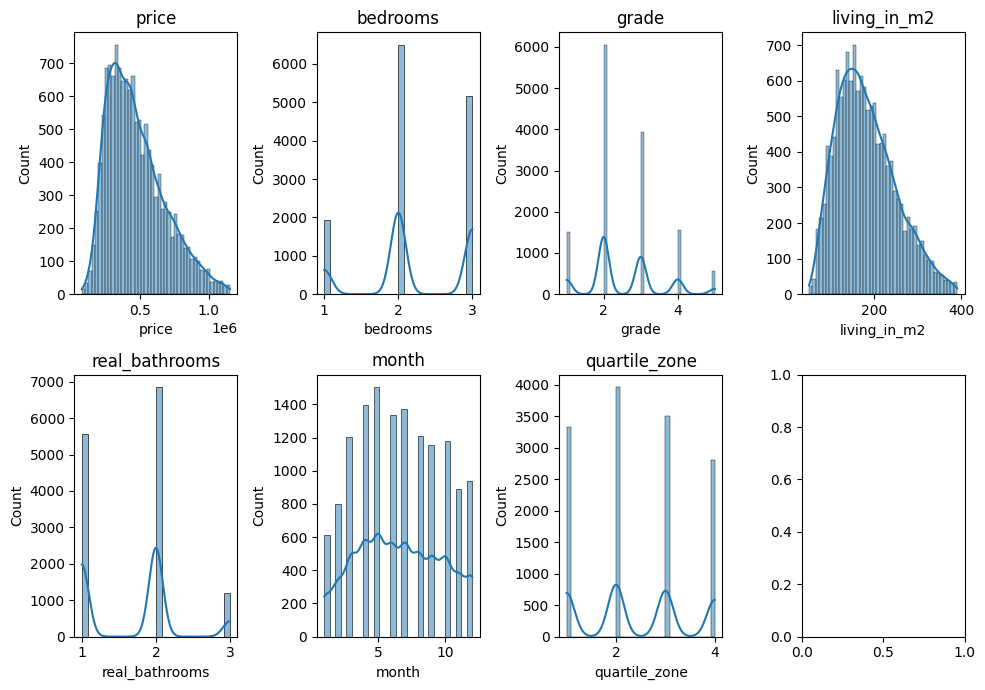

In [ ]:
f, ax = plt.subplots(2,4,figsize = (10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = db , x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

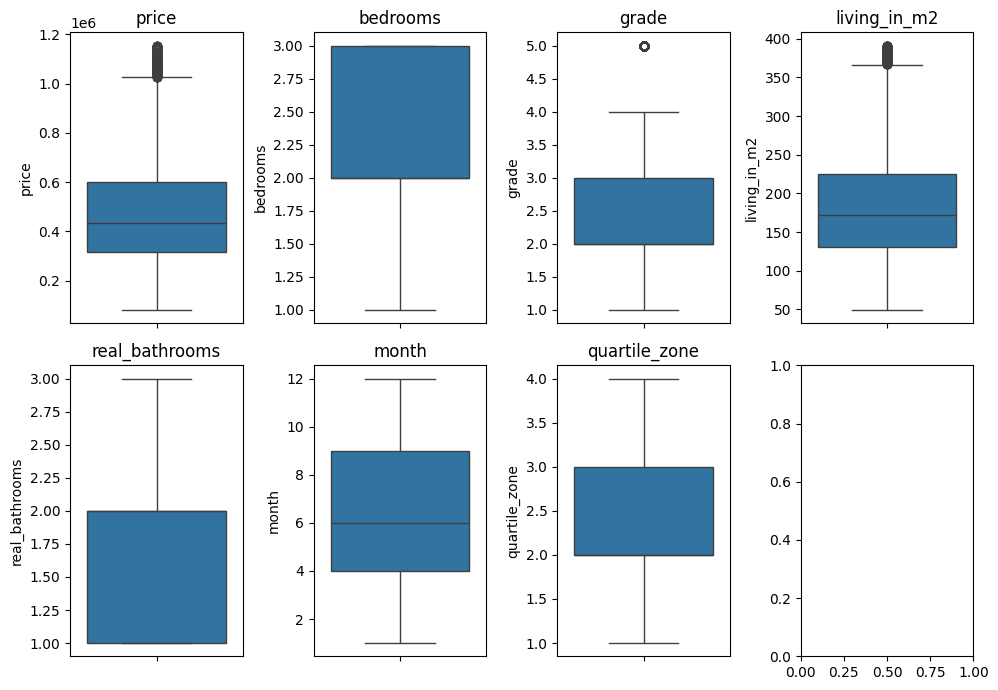

In [ ]:
f, ax = plt.subplots(2,4 , figsize=(10, 7))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data= db, y= cols, ax = ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

In [ ]:
bedrooms = db.groupby(['bedrooms'])['price'].mean().reset_index()

In [ ]:
bedrooms

,bedrooms,price
0,1,387429.674961
1,2,440477.446376
2,3,551781.745602


In [ ]:

fig = px.bar(
    bedrooms,
    x='bedrooms',
    y=num_cols[0],
    text_auto=True,
    title='Average Normalized Price by Number of Bedrooms',
    template='plotly'
)

fig.show()

In [ ]:
grade = db.groupby(['grade'])['price'].mean().reset_index()
grade

,grade,price
0,1,296385.488310
1,2,400970.431758
2,3,524334.108944
3,4,687338.949839
4,5,828474.205455


In [ ]:
px.bar(grade, x= 'grade' , y = 'price', text_auto = True, title = 'Average price by number of grade', template='plotly')

In [ ]:
view = db.groupby(['nice_view'])['price'].mean().reset_index()
view

,nice_view,price
0,False,460870.934384
1,True,648863.416107


In [ ]:
fig = px.histogram(view,
                   x="nice_view",
                   y="price",
                   histfunc="avg",
                   title='Average Price by View Assessment',
                   template='plotly',
                   text_auto=True,
                   nbins=len(view['nice_view'].unique()))
fig.show()

In [ ]:
Living  = db.groupby(['living_in_m2'])['price'].mean().reset_index()
Living

,living_in_m2,price
0,49.23859,2.965000e+05
1,50.16762,3.850000e+05
2,51.09665,3.530000e+05
3,52.02568,2.990000e+05
4,52.95471,1.999750e+05
...,...,...
665,387.40551,8.404333e+05
666,388.33454,9.113633e+05
667,389.26357,9.175000e+05
668,390.19260,9.650000e+05


In [ ]:
fig = px.histogram(Living,
                   x="living_in_m2",
                   title='Distribution of Living Area (living_in_m2)',
                   template='plotly',
                   nbins=30)

fig.show()

In [ ]:
db['total_bathroom'] = db['real_bathrooms'] + db['has_lavatory']

In [ ]:
bathroom  = db.groupby(['total_bathroom'])['price'].mean().reset_index()
bathroom

,total_bathroom,price
0,1,348612.680577
1,2,435198.395707
2,3,529579.927071
3,4,714358.921875


In [ ]:
fig = px.histogram(bathroom,
                   x="total_bathroom",
                   y="price",
                   histfunc="avg",
                   title='Average Price Distribution by Total Bathrooms',
                   template='plotly',
                   nbins=len(bathroom['total_bathroom'].unique()))
fig.show()

In [ ]:
fig = px.line(bathroom,
             x='total_bathroom',
             y='price',
             title='Trend of Average Prices by Total Bathrooms',
             template='plotly',
             markers=True)

fig.show()

In [ ]:
floor = db.groupby(['single_floor'])['price'].mean().reset_index()
floor

,single_floor,price
0,False,536432.376338
1,True,417047.505024


In [ ]:
fig = px.histogram(floor,
                   x="single_floor",
                   y="price",
                   histfunc="avg",
                   title='Average Price Distribution by Single floor',
                   template='plotly',
                   nbins=len(floor['single_floor'].unique()))
fig.show()

In [ ]:
lav = db.groupby(['has_lavatory'])['price'].mean().reset_index()
lav

,has_lavatory,price
0,False,405966.047685
1,True,507784.354644


In [ ]:
zone = db.groupby(['quartile_zone'])['price'].mean().reset_index()
zone

,quartile_zone,price
0,1,295797.348348
1,2,411642.706966
2,3,553384.510426
3,4,680573.002493


In [ ]:
fig = px.histogram(zone,
                   x="quartile_zone",
                   y="price",
                   histfunc="avg",
                   title='Average Price Distribution by Quartile_Zone',
                   template='plotly',
                   nbins=len(zone['quartile_zone'].unique()))
fig.show()

In [ ]:
db.columns

Index(['price', 'bedrooms', 'grade', 'has_basement', 'living_in_m2',
       'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
       'has_lavatory', 'single_floor', 'month', 'quartile_zone', 'date_year',
       'date_month', 'date_day', 'total_bathroom'],
      dtype='object')

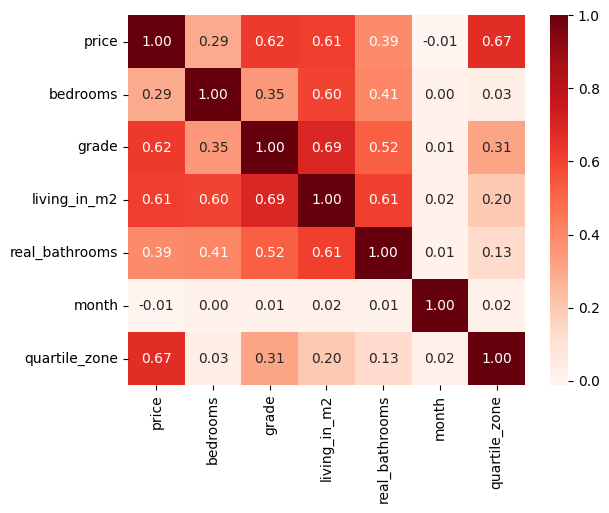

In [ ]:
sns.heatmap(db[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

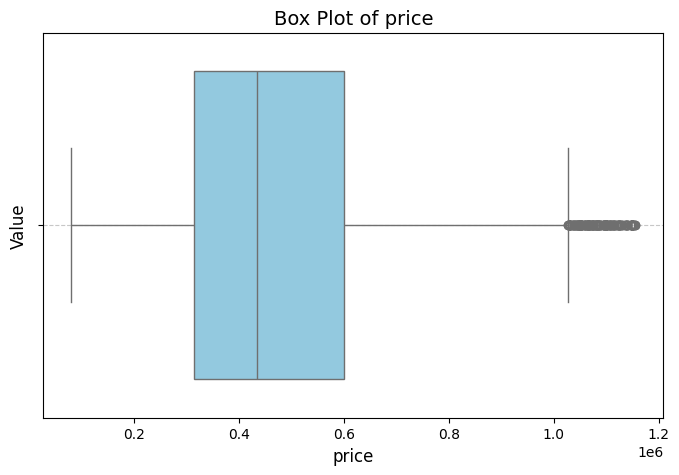

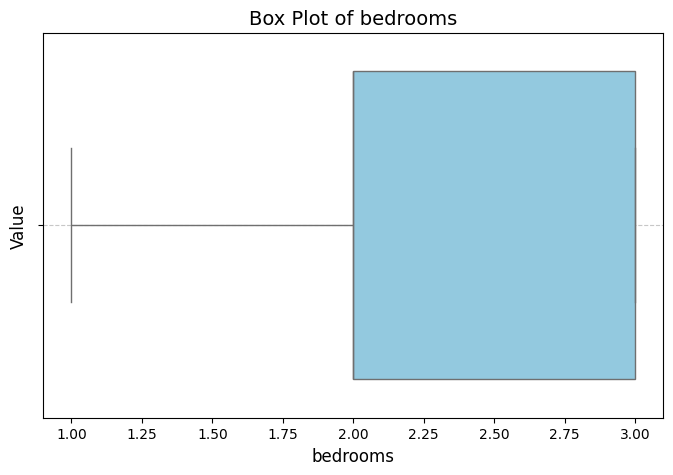

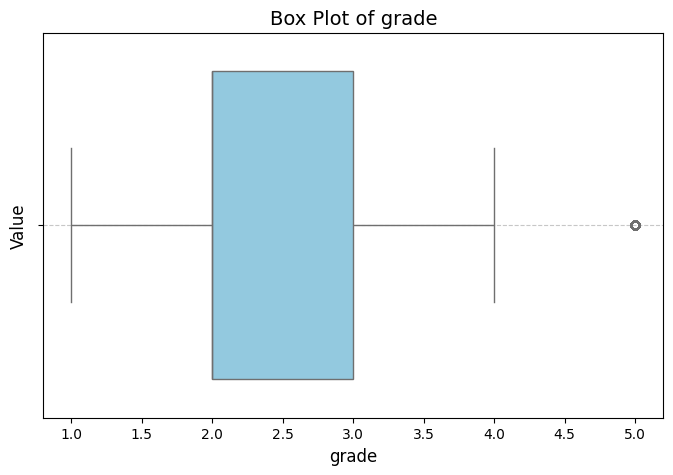

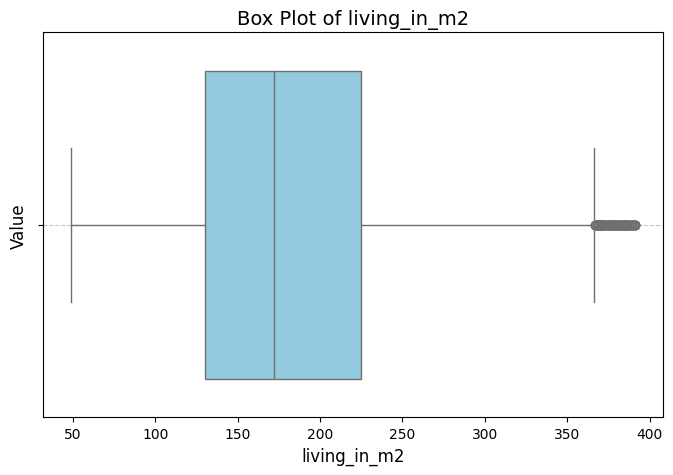

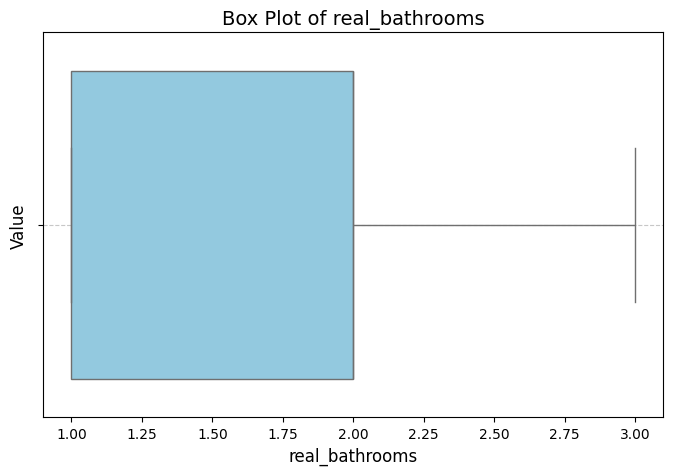

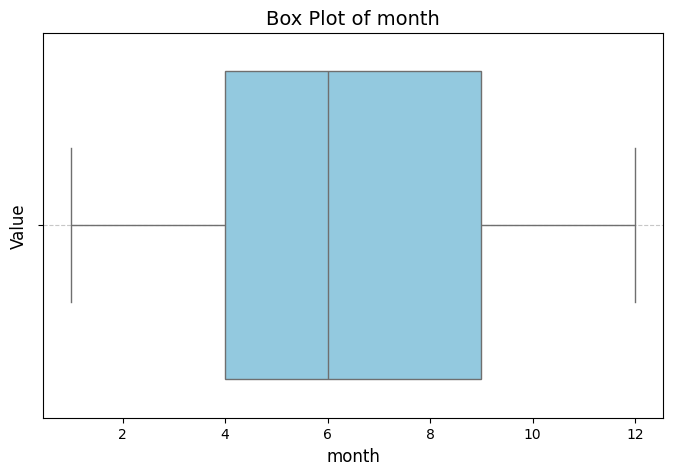

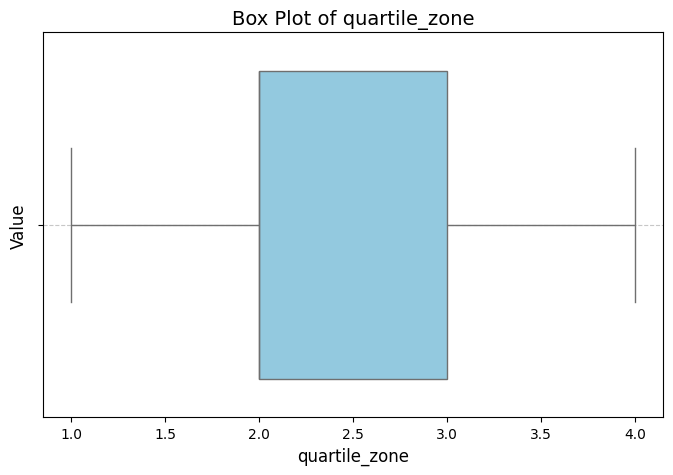

In [ ]:
for column in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=db, x=column, color='skyblue')
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## **DATA PREPROCESSING**

In [ ]:

db['total_bathroom'] = db['real_bathrooms'] + db['has_lavatory']
db['total_bathroom']



,total_bathroom
0,3
1,2
2,1
3,3
4,3
...,...
13598,3
13599,3
13600,3
13601,3


In [ ]:
scaler = StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(db[num_cols])


In [ ]:
Scaler = MinMaxScaler()
db[num_cols] = scaler.fit_transform(db[num_cols])


In [ ]:
db[num_cols] = np.abs(db[num_cols])

## **MULTICOLLINERITY**

In [ ]:
def calculate_vif(db, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(db[features].values, i) for i in range(len(features))]
    return vif_data

vif_db = calculate_vif(db, num_cols)
print(vif_db)


          feature       VIF
0           price  3.843722
1        bedrooms  3.346911
2           grade  4.508600
3    living_in_m2  4.430015
4  real_bathrooms  4.108562
5           month  3.035728
6   quartile_zone  3.982376


In [ ]:
db.columns

Index(['price', 'bedrooms', 'grade', 'has_basement', 'living_in_m2',
       'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
       'has_lavatory', 'single_floor', 'month', 'quartile_zone', 'date_year',
       'date_month', 'date_day', 'total_bathroom'],
      dtype='object')

## **MODEL BUILDING**

In [ ]:
x = db.drop('price', axis=1)  # (all columns except 'price')
y = db['price']

In [ ]:
X_train = db.drop(columns=['price'])
y_train = db['price']
X_test = db_1.drop(columns=['price'])
y_test = db_1['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 ,random_state=42)

In [ ]:
mean = X_train.mean()
std = X_train.std()

In [ ]:
mean = x_train.mean()
std = x_train.std()
X_train_zscore = (x_train - mean) / std
X_test_zscore = (x_test - mean) / std


In [ ]:
print("First few rows of Z-score transformed training data:")
print(X_train_zscore.head())
print("\nFirst few rows of Z-score transformed testing data:")
print(X_test_zscore.head())

First few rows of Z-score transformed training data:
       bedrooms     grade  has_basement  living_in_m2  renovated  nice_view  \
11226  0.507152  1.226782     -0.781052      1.205400  -0.204375  -0.288937   
11979 -0.947041 -0.636445     -0.781052     -1.374298  -0.204375  -0.288937   
8120   1.833568 -0.524249      1.280198      0.467014  -0.204375  -0.288937   
11661  0.507152 -0.524249      1.280198      0.275779  -0.204375  -0.288937   
5785   0.507152 -0.524249      1.280198     -0.834455  -0.204375  -0.288937   

       perfect_condition  real_bathrooms  has_lavatory  single_floor  \
11226           -0.28674       -0.798104      0.684416     -1.020755   
11979           -0.28674       -0.798104      0.684416     -1.020755   
8120            -0.28674        0.414337     -1.460957      0.979571   
11661           -0.28674       -0.798104      0.684416     -1.020755   
5785            -0.28674        0.414337     -1.460957     -1.020755   

          month  quartile_zone  date_ye

In [ ]:

# Now fit the model with the correctly sized data
model = LinearRegression()
model.fit(X_train_zscore, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([-5.24338749, -5.33132111, -5.15239659, ..., -5.27147674,
       -5.31814249, -5.42840408])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
models = {
    "OLS": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


common_cols = list(set(X_train.columns) & set(X_test.columns))

# Select only the common columns from both DataFrames
X_train_common = X_train[common_cols]
X_test_common = X_test[common_cols]

# Now fit the scaler on the common columns of the training data
scaler = StandardScaler()
scaler.fit(X_train_common)

# Transform both training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train_common)
X_test_scaled = scaler.transform(X_test_common)

In [ ]:
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



ValueError: X has 12 features, but LinearRegression is expecting 16 features as input.

In [ ]:
# prompt: correct above code X has 7 features, but LinearRegression is expecting 15 features as input.

# ... (Your existing code) ...

# ## **MODEL BUILDING**
x = db.drop('price', axis=1)  # (all columns except 'price')
y = db['price']
X_train = db.drop(columns=['price'])
y_train = db['price']

# Assuming db_1 has the same structure as db for the test set
X_test = db_1.drop(columns=['price'])
y_test = db_1['price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Now fit the model with the correctly sized data
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)


# ... (Rest of your code) ...

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


common_cols = list(set(X_train.columns) & set(X_test.columns))


X_train_subset = X_train[common_cols]
X_test_subset = X_test[common_cols]

scaler = StandardScaler()
scaler.fit(X_train_subset)
X_train_scaled = scaler.transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)



In [ ]:
results = []
for name, model in models.items():


    X_train_scaled_subset = X_train_scaled[:len(y_train)]

    model.fit(X_train_scaled_subset, y_train)


    train_preds = model.predict(X_train_scaled_subset)


    X_test_scaled_subset = X_test_scaled[:len(y_test)]  # This line is crucial
    test_preds = model.predict(X_test_scaled_subset) # Predict on the subset


    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    results.append([name, train_rmse, test_rmse, train_mae, test_mae, train_mse, test_mse])

In [ ]:
if name == "OLS":
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
else:
    train_r2 = test_r2 = None

In [ ]:
y_train_preds = ols_model.predict(X_train_scaled)
y_test_preds = ols_model.predict(X_test_scaled)

In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming you intend to use Linear Regression as your OLS model
ols_model = LinearRegression()
# Ensure X_train_scaled and y_train have the same number of samples
ols_model.fit(X_train_scaled[:len(y_train)], y_train)  # Fit the model to your training data, using only the first len(y_train) samples of X_train_scaled

# Now you can use ols_model for prediction:
# Predict on the entire X_train_scaled and X_test_scaled
y_train_preds = ols_model.predict(X_train_scaled)
y_test_preds = ols_model.predict(X_test_scaled)

In [ ]:
ols_results = {
    "Model": "OLS (Linear Regression)",
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse,
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train R2": train_r2,
    "Test R2": test_r2
}

In [ ]:
ols_results_df = pd.DataFrame([ols_results])
print(ols_results_df)

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)


ValueError: Found input variables with inconsistent numbers of samples: [13601, 10200]

In [ ]:
y_train_preds_knn = knn_model.predict(X_train_scaled)
y_test_preds_knn = knn_model.predict(X_test_scaled)

In [ ]:
train_rmse_knn = np.sqrt(mean_squared_error(y_train, y_train_preds_knn))
train_mae_knn = mean_absolute_error(y_train, y_train_preds_knn)
train_mse_knn = mean_squared_error(y_train, y_train_preds_knn)


In [ ]:
knn_results = {
    "Model": "KNN (k=5)",
    "Train RMSE": train_rmse_knn,
    "Test RMSE": test_rmse_knn,
    "Train MAE": train_mae_knn,
    "Test MAE": test_mae_knn,
    "Train MSE": train_mse_knn,
    "Test MSE": test_mse_knn,
    "Train R2": None,
    "Test R2": None
}

In [ ]:
knn_results_db = pd.DataFrame([knn_results])
print(knn_results_db)

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

In [ ]:
y_train_preds_tree = tree_model.predict(X_train_scaled)
y_test_preds_tree = tree_model.predict(X_test_scaled)

In [ ]:
train_rmse_tree = np.sqrt(mean_squared_error(y_train, y_train_preds_tree))
train_mae_tree = mean_absolute_error(y_train, y_train_preds_tree)
train_mse_tree = mean_squared_error(y_train, y_train_preds_tree)

In [ ]:
test_rmse_tree = np.sqrt(mean_squared_error(y_test, y_test_preds_tree))
test_mae_tree = mean_absolute_error(y_test, y_test_preds_tree)
test_mse_tree = mean_squared_error(y_test, y_test_preds_tree)

In [ ]:
tree_results = {
    "Model": "Decision Tree",
    "Train RMSE": train_rmse_tree,
    "Test RMSE": test_rmse_tree,
    "Train MAE": train_mae_tree,
    "Test MAE": test_mae_tree,
    "Train MSE": train_mse_tree,
    "Test MSE": test_mse_tree,
    "Train R2": None,
    "Test R2": None
}

tree_results_df = pd.DataFrame([tree_results])
print(tree_results_df)

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

In [ ]:
y_train_preds_svr = svr_model.predict(X_train_scaled)
y_test_preds_svr = svr_model.predict(X_test_scaled)

In [ ]:
train_rmse_svr = np.sqrt(mean_squared_error(y_train, y_train_preds_svr))
train_mae_svr = mean_absolute_error(y_train, y_train_preds_svr)
train_mse_svr = mean_squared_error(y_train, y_train_preds_svr)

test_rmse_svr = np.sqrt(mean_squared_error(y_test, y_test_preds_svr))
test_mae_svr = mean_absolute_error(y_test, y_test_preds_svr)
test_mse_svr = mean_squared_error(y_test, y_test_preds_svr)


In [ ]:
svr_results = {
    "Model": "SVR",
    "Train RMSE": train_rmse_svr,
    "Test RMSE": test_rmse_svr,
    "Train MAE": train_mae_svr,
    "Test MAE": test_mae_svr,
    "Train MSE": train_mse_svr,
    "Test MSE": test_mse_svr,
    "Train R2": None,
    "Test R2": None
}

svr_results_df = pd.DataFrame([svr_results])
print(svr_results_df)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer
])


In [ ]:
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

y_train_preds_nn = nn_model.predict(X_train_scaled).flatten()
y_test_preds_nn = nn_model.predict(X_test_scaled).flatten()

train_rmse_nn = np.sqrt(mean_squared_error(y_train, y_train_preds_nn))
train_mae_nn = mean_absolute_error(y_train, y_train_preds_nn)
train_mse_nn = mean_squared_error(y_train, y_train_preds_nn)

test_rmse_nn = np.sqrt(mean_squared_error(y_test, y_test_preds_nn))
test_mae_nn = mean_absolute_error(y_test, y_test_preds_nn)
test_mse_nn = mean_squared_error(y_test, y_test_preds_nn)


nn_results = {
    "Model": "Neural Network",
    "Train RMSE": train_rmse_nn,
    "Test RMSE": test_rmse_nn,
    "Train MAE": train_mae_nn,
    "Test MAE": test_mae_nn,
    "Train MSE": train_mse_nn,
    "Test MSE": test_mse_nn,
    "Train R2": None,
    "Test R2": None
}

nn_results_df = pd.DataFrame([nn_results])
print(nn_results_df)

In [ ]:
db .columns

In [ ]:

correlation_matrix = db[['living_in_m2', 'price']].corr()
print(correlation_matrix)


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The Support Vector Regression (SVR) model stands out as the best-performing model for this dataset. It achieves the
lowest Test RMSE (0.568735), Test MAE (0.414377), and Test MSE (0.323459) compared to all other models. These
metrics indicate that SVR provides the most accurate predictions on the test set with minimal deviation from the actual
values. Additionally, the close alignment between its training and testing metrics highlights its robust generalization
capabilities and resistance to overfitting, unlike the Decision Tree model, which heavily overfits the training data.
While the Neural Network also performs well, with the lowest training errors, its testing errors are slightly higher than
SVR, suggesting that SVR captures the relationships in the data more effectively for unseen samples. In contrast, the OLS
(Linear Regression) and KNN models show stable performance but are outperformed by SVR in terms of accuracy. The
Decision Tree, despite its near-perfect performance on the training set, fails to generalize and has the highest testing errors,
making it the least suitable model.
Thus, SVR is the optimal choice for predicting the target variable due to its balance of accuracy, robustness, and ability to
handle complex patterns in the data effectively.